# Waiting time for Commuter 

When you coming to a train station, you will think about: "How long do I need to wait for comming train?"

In 2022, the average waiting time on a commute trip in Singapore amounted to about nine minutes. The public transport system in Singapore is made up of buses and two different rail systems: the mass rapid transit (MRT) and light rail transit (LRT).

To estimate the waiting time, we need a probabilistic distribution that is able to model happening event during some specific time. Poisson distribution $\mathcal{P}$, is a good way do do that:
$$
\mathcal{P} = \frac{\lambda^k * e^{-\lambda}}{k!}
$$

$\lambda$ is a rate: number of events given a interval. eg: 3 calls per minutes at a call center. Then $\mathcal{P}$ is the probability that we have k events in the same  interval. 
in the call center: Receiving k = 1 to 4 calls then has a probability of about 0.77, while receiving 0 or at least 5 calls has a probability of about 0.23.

# Time between trains

The waiting time also depends on the time between trains. If the time from previous train and next train is small, customer likely needs to wait 
during shorted time. Otherwise, if the time from previous train and next train is longer, customers likely needs to wait longer. Somehow, we have a mixture distribution here that contains time between trains. 

Assumption is we have data of time between trains. In reality, we are able to extract them from logs, APIs or measure them. Now, we are going to model the distribution of time between trains

## Implementation

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np
from scipy.stats import gaussian_kde

In [2]:
time_between_trains = [
    428.0, 705.0, 407.0, 465.0, 433.0, 425.0, 204.0, 506.0, 143.0, 351.0, 
    450.0, 598.0, 464.0, 749.0, 341.0, 586.0, 754.0, 256.0, 378.0, 435.0, 
    176.0, 405.0, 360.0, 519.0, 648.0, 374.0, 483.0, 537.0, 578.0, 534.0, 
    577.0, 619.0, 538.0, 331.0, 186.0, 629.0, 193.0, 360.0, 660.0, 484.0, 
    512.0, 315.0, 457.0, 404.0, 740.0, 388.0, 357.0, 485.0, 567.0, 160.0, 
    428.0, 387.0, 901.0, 187.0, 622.0, 616.0, 585.0, 474.0, 442.0, 499.0, 
    437.0, 620.0, 351.0, 286.0, 373.0, 232.0, 393.0, 745.0, 636.0, 758.0,
]

In [24]:
# convert them to minutes
zs = np.array(time_between_trains) / 60
zs.min(), zs.max(), len(zs)

(2.3833333333333333, 15.016666666666667, 70)

In [25]:
# modelling the observation distribution (prior)
qs = np.linspace(0, 20, 101)
kde = gaussian_kde(zs)
ps = kde(qs)

ps = ps/np.sum(ps)

len(ps), len(qs)

(101, 101)

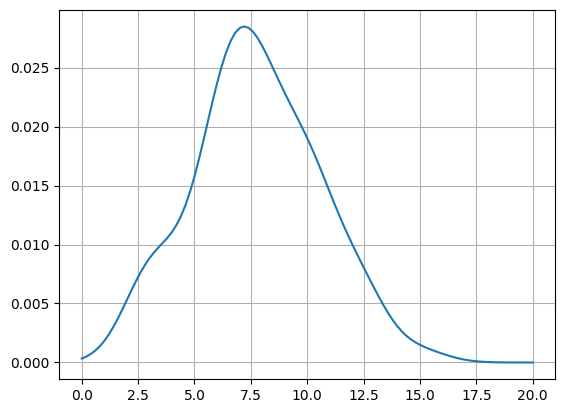

In [26]:
plt.plot(qs, ps)

plt.grid()
plt.show()

In [28]:
# Modelling posterior distribution of time between trains
likelihood = np.linspace(0, 20, 101)
posterior = likelihood * ps 
posterior = posterior/np.sum(posterior)

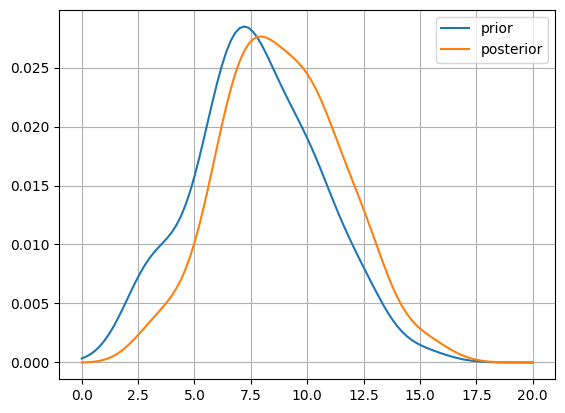

In [32]:
plt.plot(qs, ps, label = "prior")
plt.plot(qs, posterior, label = "posterior")

plt.legend()
plt.grid()
plt.show()

# Cummuter comming events

Assume that cummuter comes to station with constant rate $\lambda$, then the probability that there are k commuters come:
$$
\mathcal{P} =  \frac{\lambda ^ k \cdot e^{-\lambda}} {k!}
$$

In [33]:
from scipy.stats import poisson

lambdas = []
poisson(0).pmf(0)

1.0